<a href="https://colab.research.google.com/github/SiddSai/Learning-PyTorch/blob/main/DeepLearningWithPytorch_simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [41]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  #Hidden Layer1 (number of neurons) -->
  #Hidden Layer2 (number of neurons) -->
  # Output (3 classes of iris flowers)

  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    # Do something but if output is less than 0, call it 0
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [42]:
# Pick a manual sed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [45]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
# Last column: str --> int
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

my_df

/tmp/ipython-input-3778285996.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [47]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [48]:
X = X.values
y = y.values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [51]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [52]:
# Convert y features to float tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [53]:
# Set criterion of model to measure the error, how ar off predictions are from data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learnin rate (if error doesn't go down after a bunch of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [54]:
# Train our model
# Epochs? (one through all trainin data in network)

epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train values

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and lss: {loss}')

  # Back propagation:
  # Take error rate of forward propaation and feet it back
  # through the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and lss: 1.1251550912857056
Epoch: 10 and lss: 1.0096259117126465
Epoch: 20 and lss: 0.8157405853271484
Epoch: 30 and lss: 0.585706353187561
Epoch: 40 and lss: 0.3999636471271515
Epoch: 50 and lss: 0.2676880657672882
Epoch: 60 and lss: 0.17942363023757935
Epoch: 70 and lss: 0.12151690572500229
Epoch: 80 and lss: 0.0860118418931961
Epoch: 90 and lss: 0.06520850956439972


Text(0.5, 0, 'epoch')

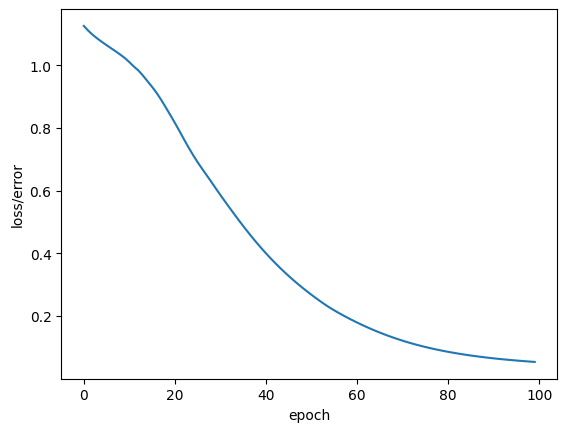

In [55]:
# See loss function

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [56]:
# Evalue Model on Test Data Set (validate model on test set)

with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test = features from our test set, y_eval will be our predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [57]:
loss

# Does not look reat

tensor(0.1315)

In [61]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      name = "Setosa"
    elif y_test[i] == 1:
      name = "Versicolor"
    else:
      name = "Virginica"
    # Tells us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {name} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Correct: {correct}')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 Virginica 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 Virginica 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 Virginica 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 Versicolor 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 Virginica 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 Versicolor 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 Virginica 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 Versicolor 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 Virginica 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 Virginica 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 Virginica 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 Setosa 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 Setosa 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 Versicolor 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 Setosa 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 Virginica 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 Setosa 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 Versi

In [62]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [63]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [65]:
new_iris2 = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
  print(model(new_iris2))

tensor([-5.9944,  4.5077,  6.6792])


In [66]:
# Save our NN Model

torch.save(model.state_dict(), 'iris_classification_model.pt')

In [68]:
# Load saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_classification_model.pt'))

<All keys matched successfully>

In [69]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [71]:
new_iris3 = torch.tensor([5.3, 3.2, 5.3, 1.9])

with torch.no_grad():
  print(model(new_iris3))

tensor([-6.3923,  3.6395,  8.3622])
